### Extract the dataset and split accordingly

- Unzip the dataset
- Split the dataset into train, validation and test sets
- From the metadata build the train, validation and test images and labels folders
- Load the Images from directory

In [1]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import helper_funcs as helper
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import json
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')

# model analysis and development
import edgeimpulse as ei
from livelossplot import PlotLossesKeras 

# Import the necessary callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
from livelossplot.outputs import MatplotlibPlot
from plot_keras_history import  plot_history
from sklearn.metrics import classification_report

# inferencing
from PIL import Image

# Set random seed for reproducibility
random_state = 42
tf.random.set_seed(random_state)
random.seed(random_state)

c:\Users\Austin\Desktop\Agent\dsail-tech4wildlife\.venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Austin\Desktop\Agent\dsail-tech4wildlife\.venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Austin\Desktop\Agent\dsail-tech4wildlife\

In [ ]:
# Extract the dataset to the current working directory
with zipfile.ZipFile('./dataset.zip', 'r') as zip:
    zip.extractall(f'{os.getcwd()}')

In [2]:
# load the train and test metadata
data_dir = os.path.join(os.getcwd(), 'dataset')
train_metadata_path = os.path.join(data_dir, 'train.csv')
test_metadata_path = os.path.join(data_dir, 'test.csv')

# read the data
train_df = pd.read_csv(train_metadata_path)
test_df = pd.read_csv(test_metadata_path)

# split the train set to train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# the length of all the sets
sets_len = len(train_df) + len(val_df) + len(test_df)

# print the length of each set
print(f'Train set length: {len(train_df)}, {len(train_df)/sets_len*100:.2f}%')
print(f'Validation set length: {len(val_df)}, {len(val_df)/sets_len*100:.2f}%')
print(f'Test set length: {len(test_df)}, {len(test_df)/sets_len*100:.2f}%')

Train set length: 1668, 71.83%
Validation set length: 418, 18.00%
Test set length: 236, 10.16%


In [ ]:
# build the image datasets
train_dir = os.path.join(data_dir, 'train') # location of the training data
val_dir = os.path.join(data_dir, 'train') # location of the validation data
test_dir = os.path.join(data_dir, 'test') # location of the test data

# create the training, validation and test directories
helper.split_data(train_dir, train_df, 'train')
helper.split_data(val_dir, val_df, 'val')
helper.split_data(test_dir, test_df, 'test')

In [12]:
# load the images to tensors 
train_images_path = 'train'
val_images_path = 'val'
test_images_path = 'test'

train_tensors = tf.keras.preprocessing.image_dataset_from_directory(
                                                                    'train',
                                                                    image_size=(96, 96),
                                                                    batch_size=27,
                                                                    shuffle=True,
                                                                    seed=random_state
                                                                )
val_tensors = tf.keras.preprocessing.image_dataset_from_directory(
                                                                    'val',
                                                                    image_size=(96, 96),
                                                                    batch_size=27,
                                                                    seed=random_state
                                                                )
test_tensors = tf.keras.preprocessing.image_dataset_from_directory(
                                                                    'test',
                                                                    image_size=(96, 96),
                                                                    batch_size=27,
                                                                    seed=random_state
                                                                )

# extract the train images and labels
train_images, train_labels = helper.extract_images_and_labels(train_tensors, normalize=True, categorical=True)

# extract the validation images and labels
val_images, val_labels = helper.extract_images_and_labels(val_tensors, normalize=True, categorical=True)

# extract the test images and labels
test_images, test_labels = helper.extract_images_and_labels(test_tensors, normalize=True, categorical=True)

# Define the labels dictionary
labels = {
    0: 'BUSHBUCK',
    1: 'IMPALA',
    2: 'MONKEY',
    3: 'WARTHOG',
    4: 'WATERBUCK',
    5: 'ZEBRA'
}



Found 1668 files belonging to 6 classes.
Found 418 files belonging to 6 classes.
Found 236 files belonging to 6 classes.


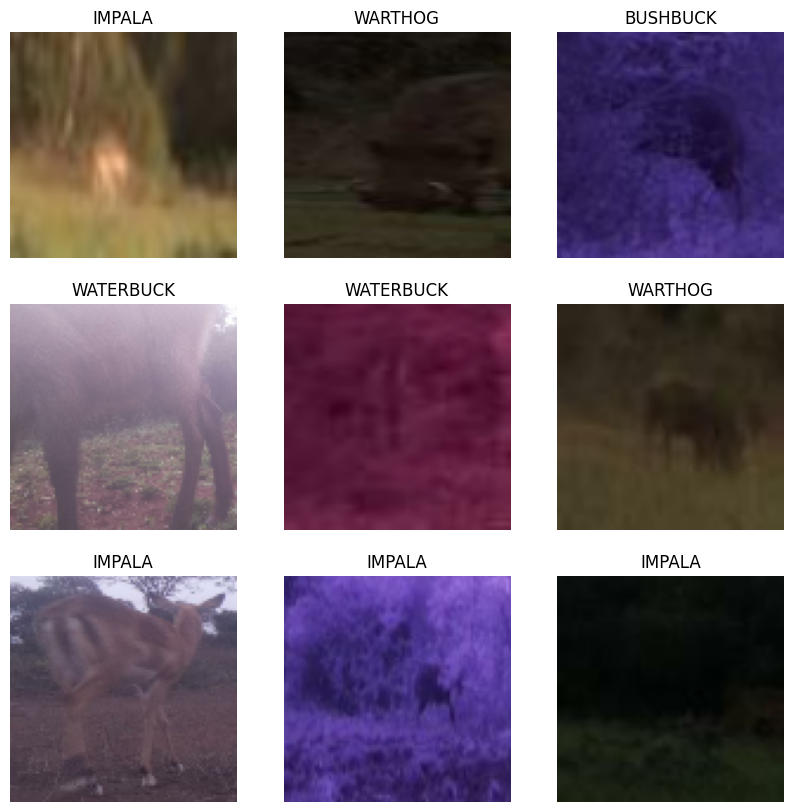

In [5]:
helper.visualize_images(train_tensors, 9)

In [6]:
helper.data_distribution(train_images_path, val_images_path, test_images_path, plot=False)

({'BUSHBUCK': 153,
  'IMPALA': 628,
  'MONKEY': 14,
  'WARTHOG': 484,
  'WATERBUCK': 264,
  'ZEBRA': 125},
 {'BUSHBUCK': 31,
  'IMPALA': 186,
  'MONKEY': 8,
  'WARTHOG': 101,
  'WATERBUCK': 61,
  'ZEBRA': 31},
 {'BUSHBUCK': 21,
  'IMPALA': 91,
  'MONKEY': 3,
  'WARTHOG': 66,
  'WATERBUCK': 37,
  'ZEBRA': 18})

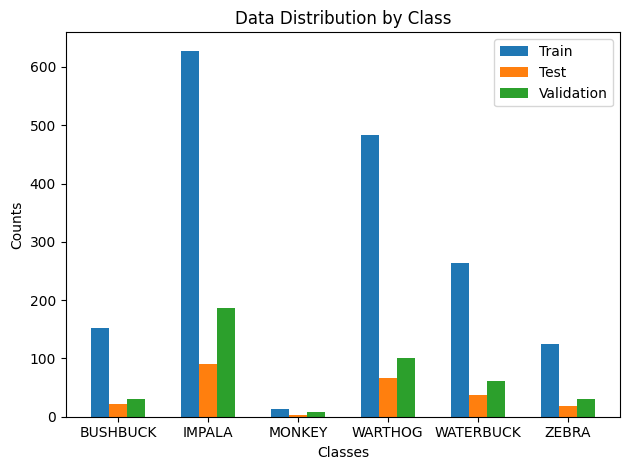

In [7]:
helper.data_distribution(train_images_path, val_images_path, test_images_path, plot=True)

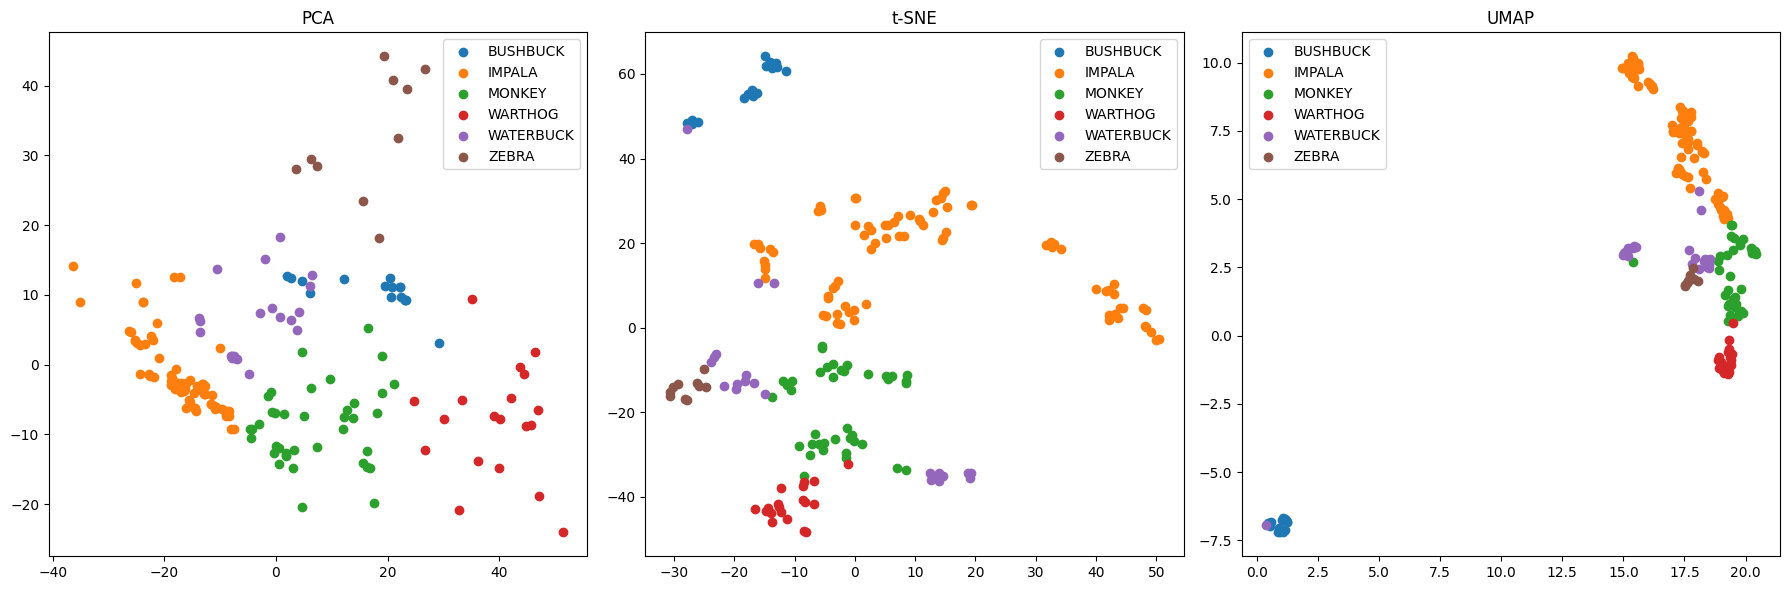

In [21]:
# Call the function with your train_images, train_labels, and labels
helper.visualize_dimensionality_reduction(train_images, train_labels, labels)


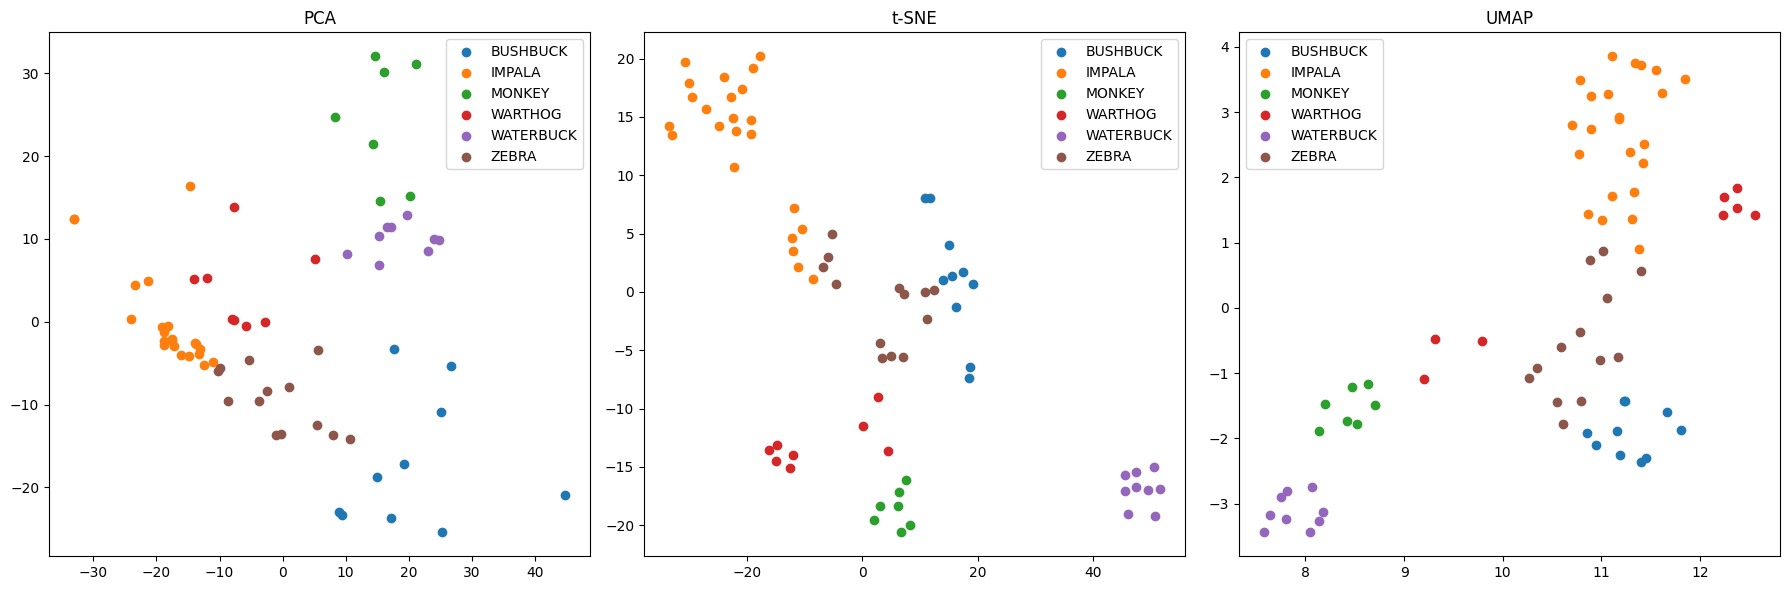

In [4]:
helper.visualize_dimensionality_reduction(val_images, val_labels, labels)


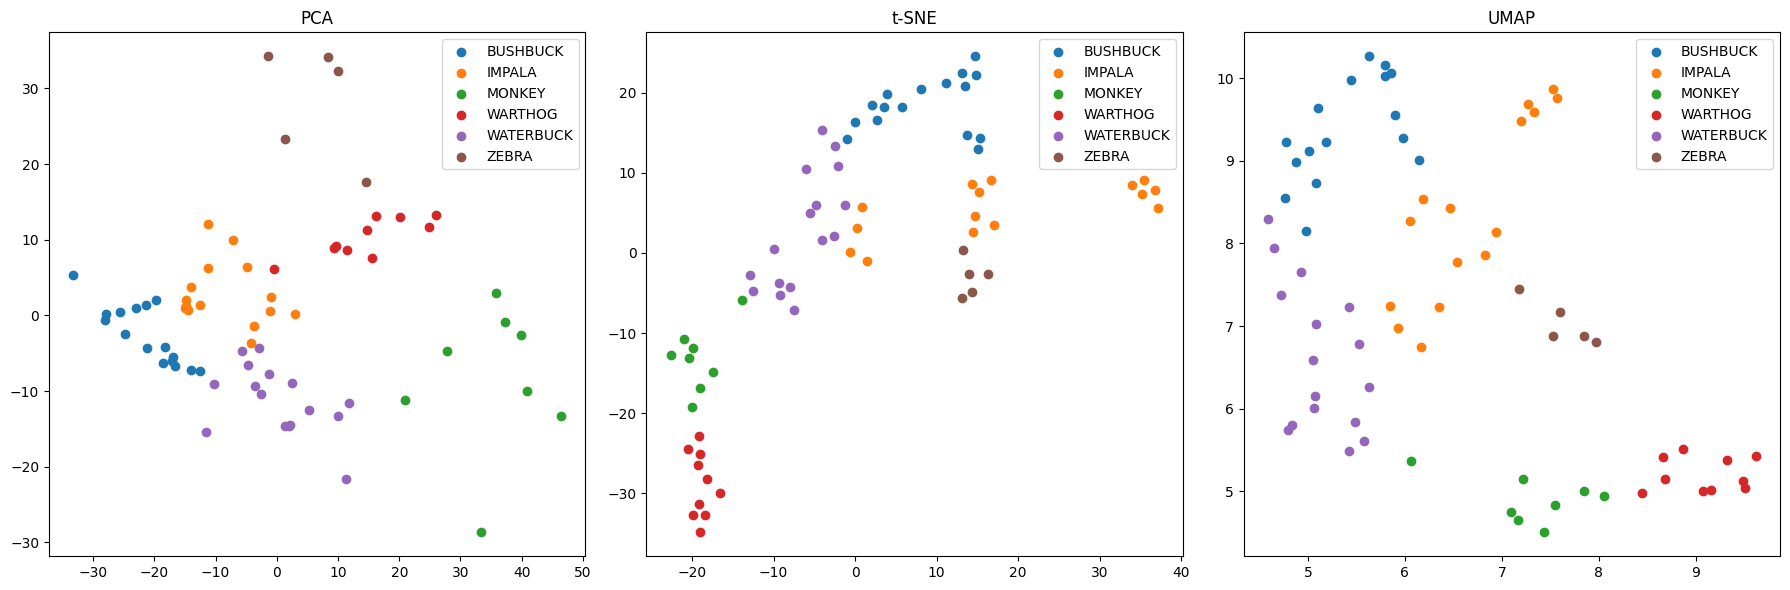

In [105]:
helper.visualize_dimensionality_reduction(val_images, val_labels, labels)


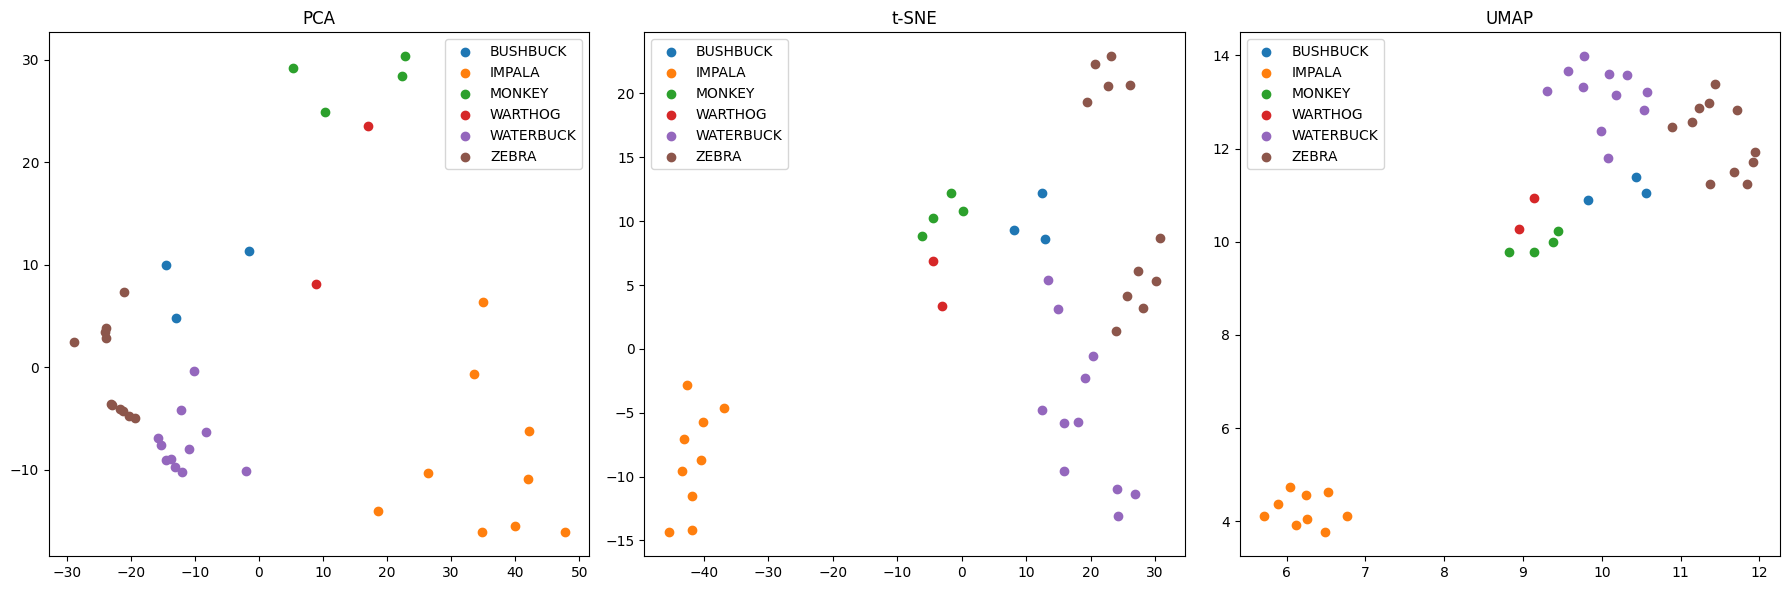

In [4]:
helper.visualize_dimensionality_reduction(test_images, test_labels, labels)


### Model Development

In [9]:
# Model Architecture leveraging pretrained weights

EPOCHS = 150
LEARNING_RATE = 0.001
NUM_CLASSES = 6
DROP_OUT = 0.1
WEIGHT_DECAY = 0.0005
ACTIVATION = 'softmax'
OPTIMIZER = 'adam'
MOMENTUM = 0.9

model = helper.build_model(num_classes=NUM_CLASSES, dropout=DROP_OUT, 
                   weight_decay=WEIGHT_DECAY, activation=ACTIVATION, 
                   optimizer=OPTIMIZER, momentum=MOMENTUM,
                   learning_rate=LEARNING_RATE)

#### Defining Callbacks

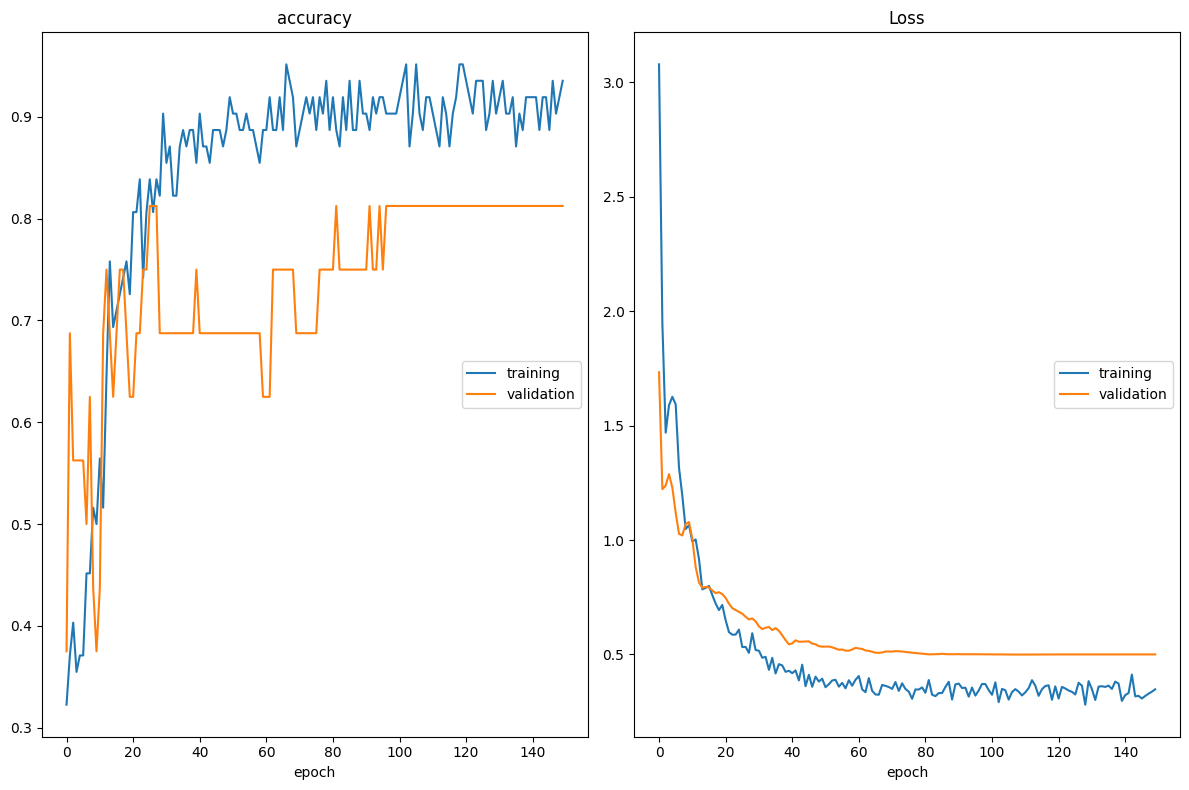

2/2 - 1s - loss: 0.3477 - accuracy: 0.9355 - val_loss: 0.5000 - val_accuracy: 0.8125 - lr: 1.0000e-06 - 724ms/epoch - 362ms/step


In [10]:
filepath = 'mobileweights_6classes.h5'
anim = PlotLossesKeras(outputs=[MatplotlibPlot()])

# Define the ModelCheckpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', 
                                                save_best_only=True, mode='min', 
                                                verbose=2)

# Define the learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                 patience=5, verbose=1, min_lr=1e-6)

# Include the lr_scheduler callback in the list of callbacks
callbacks = [checkpoint, anim, lr_scheduler]

# Train the model
history = model.fit(
                  train_images,
                  train_labels,
                  epochs=EPOCHS,
                  validation_data=(val_images, val_labels),
                  verbose=2,
                  callbacks=callbacks
                )


## Model Evaluation

(<Figure size 4500x1500 with 3 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <Axes: title={'center': 'Learning rate'}, xlabel='Epochs', ylabel='Learning rate'>],
       dtype=object))

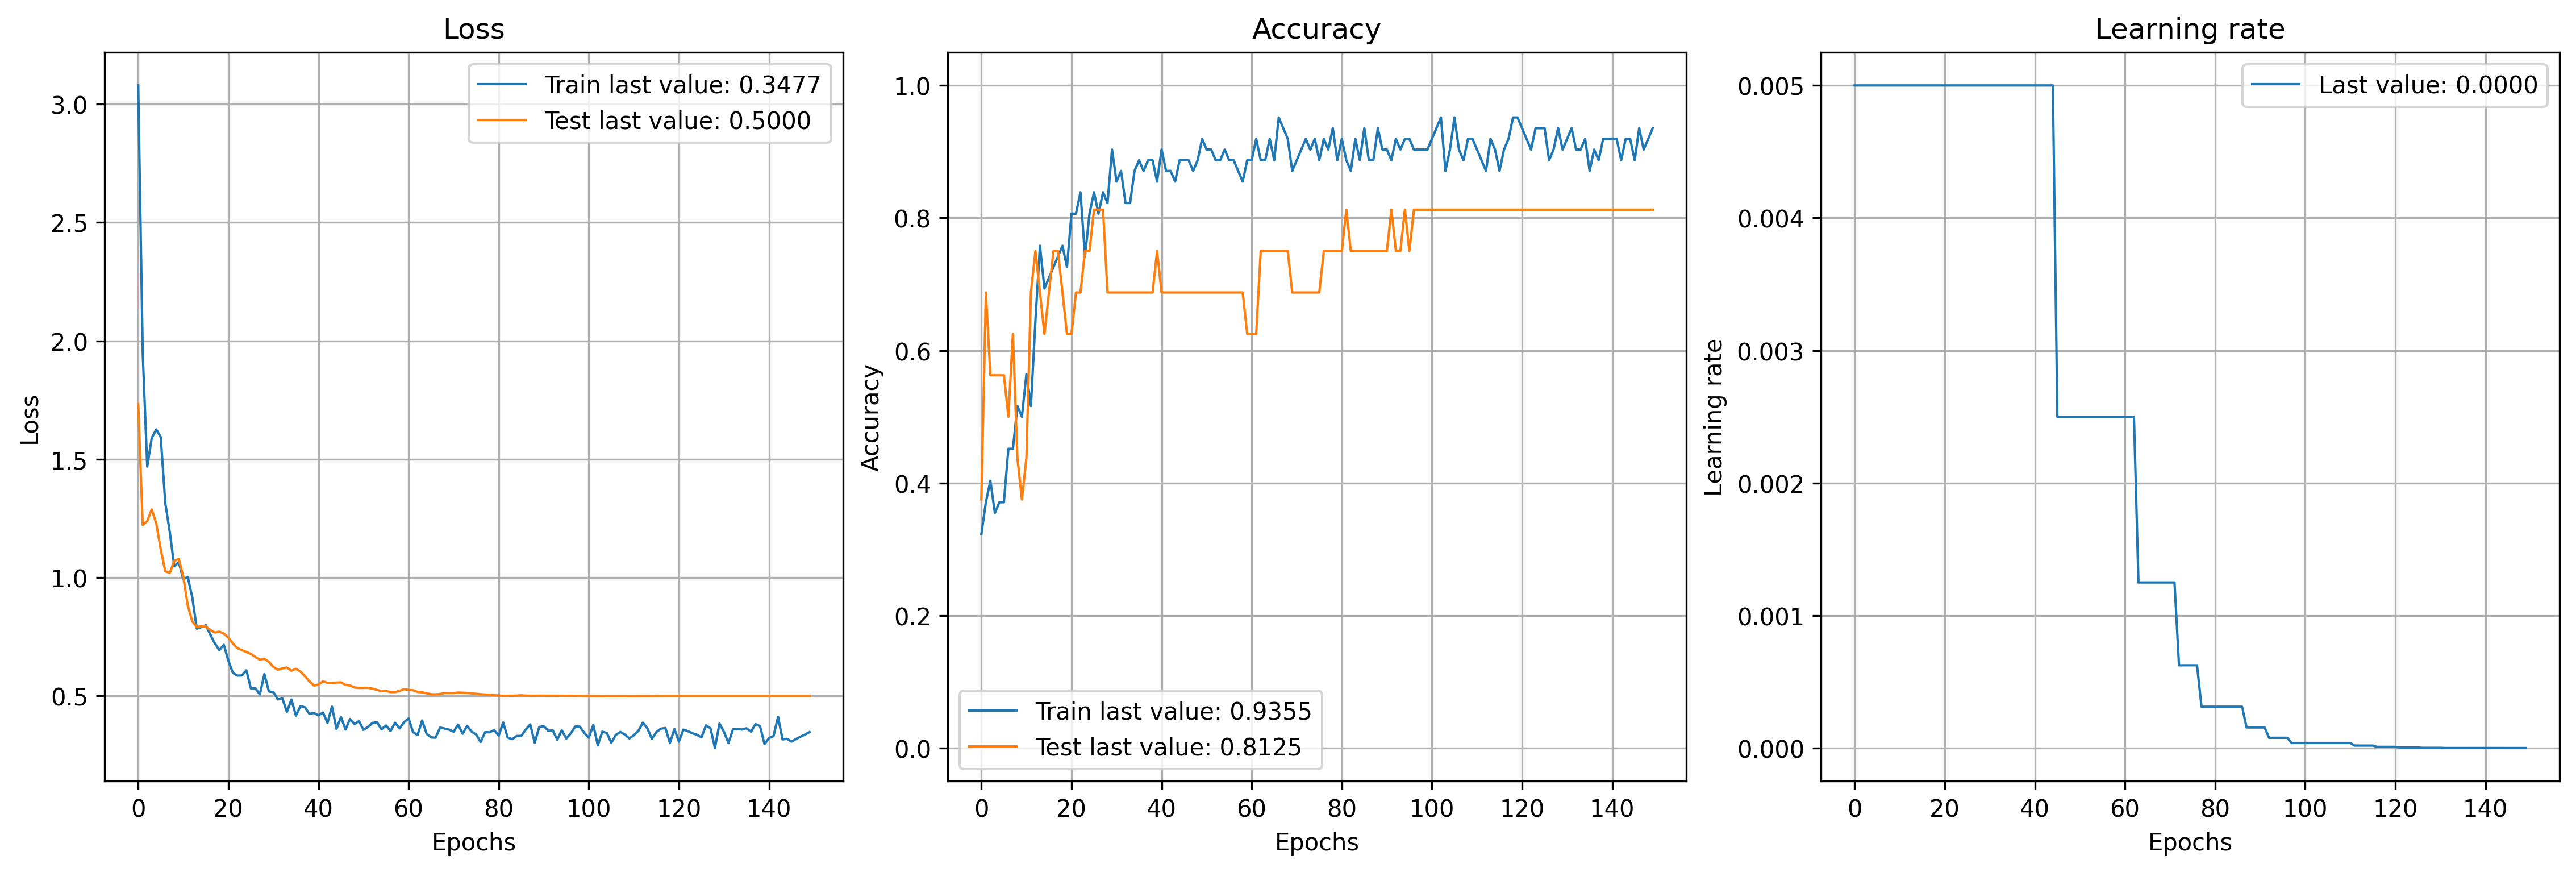

In [11]:
plot_history(history, dpi=300)

In [46]:
model = tf.keras.models.load_model('mobileweights_6classes.h5')

model.evaluate(test_images, test_labels)

1/1 [==============================] - 1s 749ms/step - loss: 0.4971 - accuracy: 0.8889


[0.4971235692501068, 0.8888888955116272]

In [47]:
from sklearn.metrics import classification_report

test_images, test_labels = helper.extract_images_and_labels(test_tensors, normalize=True, categorical=False)
y_pred = model.predict(test_images, batch_size=6, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_labels, y_pred_bool))

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           1       0.29      1.00      0.44         2
           2       0.00      0.00      0.00         1
           3       1.00      0.50      0.67         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.26      0.30      0.22         9
weighted avg       0.51      0.44      0.40         9



2/2 [==============================] - 0s 11ms/step
Class: 1
Class: 2
Class: 3
Class: 4
Class: 5


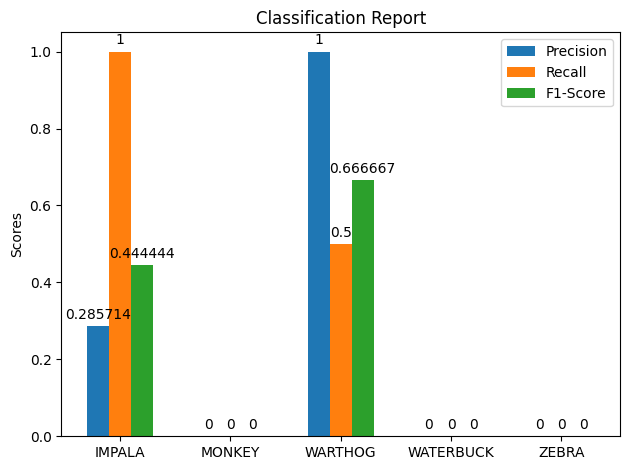

In [48]:

y_pred = model.predict(test_images, batch_size=6, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(test_labels, y_pred_bool, output_dict=True)

# Extract class names and metrics from the report
class_names = [str(label) for label in list(report.keys())[:-3]]  # Exclude 'macro avg', 'weighted avg', etc.
precision = []
recall = []
f1_score = []

for label in class_names:
    print(f'Class: {label}')
    try:
        precision.append(report[label]['precision'])
    except KeyError:
        precision.append(0)  # Handle missing precision with a default value
        
    try:
        recall.append(report[label]['recall'])
    except KeyError:
        recall.append(0)  # Handle missing recall with a default value
        
    try:
        f1_score.append(report[label]['f1-score'])
    except KeyError:
        f1_score.append(0)  # Handle missing F1-score with a default value

# Create a bar plot using Matplotlib
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels([labels[int(label)] for label in class_names])  # Using custom class labels
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()


#### Inferencing

Class: BUSHBUCK
1/1 [==============================] - 0s 418ms/step


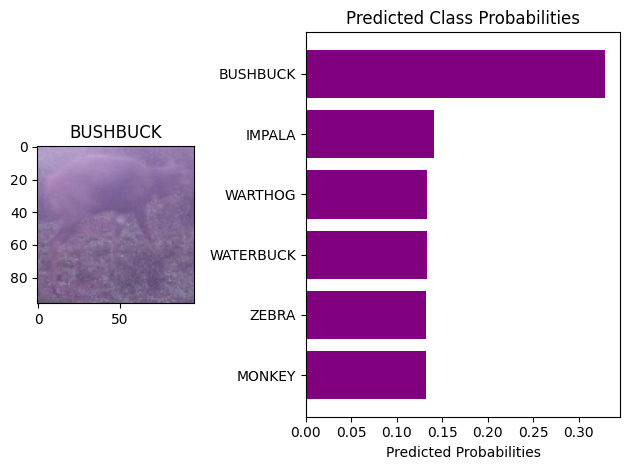

In [3]:

model = tf.keras.models.load_model('mobileweights_6classes.h5')

helper.inference_model(model)

## Model Quantization

In [133]:
def representative_dataset_generator():
    for data, _ in val_tensors.take(-1):
        yield [data]  # shape: (batch_size, height, width, channels)


# load the best model
model = tf.keras.models.load_model('mobileweights_6classes.h5')

# quantizing the model to int8
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_generator
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = [tf.dtypes.int8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

hub_m = converter.convert()

# save the keras model
with open('mobileweights_6classes.tflite', 'wb') as f:
    f.write(converter.convert())  

### Profiling and Evaluating the Model
- Evaluating the quantized int8 tflite model  
- Profiling the model to check compatibility with the MCU

In [139]:
import edgeimpulse as ei
# add the api key to edge impulse
with open('config.json') as f:
    config = json.load(f)


api_key = config['edge_impulse_api_key']
ei.API_KEY = api_key
    
# the supported devices
profile_devices = ei.model.list_profile_devices()
print(profile_devices)

# target device is open mv cam h7 plus
model_profile = ei.model.profile(model='mobileweights_6classes.tflite', device='arduino-nano-33-ble')

In [140]:
# Profiling the model to check the compatibility with the MCU
model_profile.summary()

Target results for int8:
{
    "device": "arduino-nano-33-ble",
    "tfliteFileSizeBytes": 216920,
    "isSupportedOnMcu": true,
    "memory": {
        "tflite": {
            "ram": 101216,
            "rom": 281200,
            "arenaSize": 100864
        },
        "eon": {
            "ram": 103440,
            "rom": 230424
        }
    },
    "timePerInferenceMs": 710
}


Performance on device types:
{
    "variant": "int8",
    "lowEndMcu": {
        "description": "Estimate for a Cortex-M0+ or similar, running at 40MHz",
        "timePerInferenceMs": 5301,
        "memory": {
            "tflite": {
                "ram": 100435,
                "rom": 266736
            },
            "eon": {
                "ram": 81856,
                "rom": 217496
            }
        },
        "supported": true
    },
    "highEndMcu": {
        "description": "Estimate for a Cortex-M7 or other high-end MCU/DSP, running at 240MHz",
        "timePerInferenceMs": 110,
        "memory":

## Model Deployment

In [142]:
# generating an output file for arduino-nano-33-ble-sense
print('Buuilding firmaware for arduino-nano-33-ble-sense target...')
ei.model.deploy(model='mobileweights_6classes.tflite',
                model_output_type=ei.model.output_type.Classification(),
                model_input_type=ei.model.input_type.ImageInput(),
                deploy_target='arduino-nano-33-ble-sense',
                output_directory=".",
                api_key=api_key)

In [147]:
# Write the class names to text file
with open('labels.txt', 'w') as f:
    for item in list(train_tensors.class_names):
        f.write("%s\n" % item)

In [177]:
# create a folder called openmv-model if it doesn't exist
# move the tflite file and labels.txt file into the openmv-model folder
os.makedirs('openmv-model', exist_ok=True)
os.rename('trained.tflite', 'openmv-model/trained444.tflite')
os.rename('labels.txt', 'openmv-model/labels.txt')